In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_name = 'sushruth_dataset/health_data.csv'
data = pd.read_csv(file_name)

In [9]:
data.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       'Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS]',
       'Physicians (per 1,000 people) [SH.MED.PHYS.ZS]',
       'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%) [SH.DYN.NCOM.ZS]',
       'Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]',
       'Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]',
       'Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]',
       'GDP per capita (current US$) [NY.GDP.PCAP.CD]'],
      dtype='object')

In [82]:
required = ['Country Name','Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
            'Physicians (per 1,000 people) [SH.MED.PHYS.ZS]','GDP per capita (current US$) [NY.GDP.PCAP.CD]',
            'Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]']

In [83]:
data

,Time,Time Code,Country Name,Country Code,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],"Physicians (per 1,000 people) [SH.MED.PHYS.ZS]","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%) [SH.DYN.NCOM.ZS]","Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]","Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]",Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],GDP per capita (current US$) [NY.GDP.PCAP.CD]
0,2016,YR2016,Afghanistan,AFG,63.763,..,0.2782,29.8,6.742,33.981,60.18867111,509.218661332126
1,2016,YR2016,Albania,ALB,78.194,..,1.2164,17,7.534,12.08,202.01332092,4124.05572595352
2,2016,YR2016,Algeria,DZA,76.298,..,1.8325,14.2,4.717,25.25,260.77255249,3945.48208133854
3,2016,YR2016,American Samoa,ASM,..,..,..,..,..,..,..,11696.9555623329
4,2016,YR2016,Andorra,AND,..,..,..,..,4.3,8.8,2361.2175293,37474.6654057245
5,2016,YR2016,Angola,AGO,59.925,..,..,16.5,8.716,41.882,95.12497711,3506.07288506966
6,2016,YR2016,Antigua and Barbuda,ATG,76.617,..,..,22.6,6.27,15.717,778.45111084,15197.6174551735
7,2016,YR2016,Argentina,ARG,76.221,..,4.0013,15.8,7.626,17.383,1153.53405762,12790.2424732447
8,2016,YR2016,Armenia,ARM,74.64,..,..,22.3,9.849,14.568,357.45776367,3591.82927553023
9,2016,YR2016,Aruba,ABW,75.868,..,..,..,8.765,11.404,..,28281.35048163


In [84]:
new_data = []
for i in range(data.shape[0]):
    flag = False
    tmp = []
    for j in required[1:]:
        try:
            t = float(data[j][i])
            if j == 'GDP per capita (current US$) [NY.GDP.PCAP.CD]':
                tmp.append(int(t/200))
            else:
                tmp.append(t)
        except ValueError:
            flag = True
            break
    if not flag:
        tmp.append(data[required[0]][i])
        new_data.append(tmp)

In [85]:
new_df = pd.DataFrame(new_data, columns = ['life_expectancy', 'Physicians_per_1000','GDP_per_capita','health_gdp','Country'])

In [92]:
# plt.scatter('life_expectancy', 'Physicians_per_1000', data=new_df)
# plt.xlabel("life_expectancy", size=16)
# plt.ylabel("Physicians_per_1000", size=16)
# plt.title("Scatter Plot with Matplotlib", size=18)

In [87]:
# sc = plt.scatter('life_expectancy', 'Physicians_per_1000', s = 'GDP_per_capita',alpha = 0.4,data=new_df)
# plt.xlabel("life_expectancy", size=16)
# plt.ylabel("Physicians_per_1000", size=16)
# plt.title("Scatter Plot with Matplotlib", size=18)
# handles, labels = sc.legend_elements(prop="sizes", alpha=0.6)
# # legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

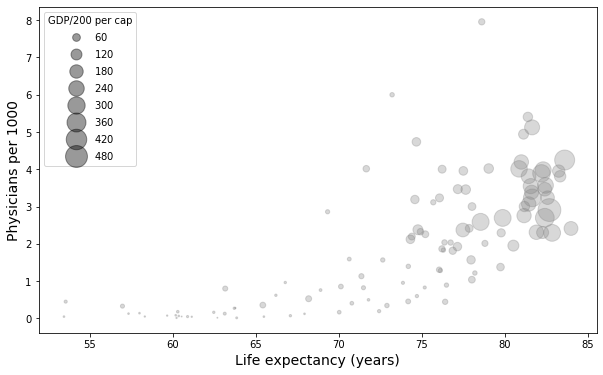

In [100]:
fig, ax = plt.subplots(figsize=(10,6))
# for color in ['tab:blue', 'tab:orange', 'tab:green']:
#     n = 750
#     x, y = np.random.rand(2, n)
#     scale = 200.0 * np.random.rand(n)
sc = ax.scatter('life_expectancy', 'Physicians_per_1000', s = 'GDP_per_capita',alpha = 0.3,data=new_df,c='gray')

# ax.legend()
# ax.grid(True)
handles, labels = sc.legend_elements(prop="sizes", alpha=0.4)
legend = ax.legend(handles, labels, loc="upper left", title="GDP/200 per cap")
# leg = ax.get_legend()
leg.legendHandles[1].set_color('red')
ax.set_xlabel("Life expectancy (years)", size=14)
ax.set_ylabel("Physicians per 1000", size=14)
plt.show()

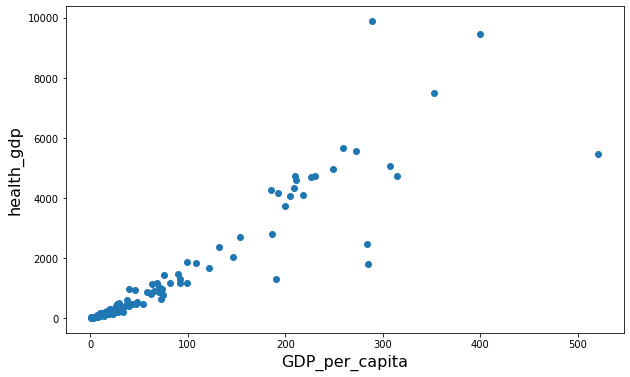

In [93]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter('GDP_per_capita', 'health_gdp',data=new_df)
ax.set_xlabel("GDP_per_capita", size=16)
ax.set_ylabel("health_gdp", size=16)
# plt.title("Scatter Plot with Matplotlib", size=18)
plt.show()

In [113]:
file_name = 'sushruth_dataset/communications.csv'
data = pd.read_csv(file_name)

In [114]:
data.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'Individuals using the Internet (% of population) [IT.NET.USER.ZS]',
       'Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]',
       'GDP per capita (current US$) [NY.GDP.PCAP.CD]'],
      dtype='object')

In [115]:
required = ['Country Name','Individuals using the Internet (% of population) [IT.NET.USER.ZS]', 
            'Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]', 
            'GDP per capita (current US$) [NY.GDP.PCAP.CD]']

In [116]:
new_data = []
for i in range(data.shape[0]):
    flag = False
    tmp = []
    for j in required[1:]:
        try:
            t = float(data[j][i])
            if j == 'GDP per capita (current US$) [NY.GDP.PCAP.CD]':
                tmp.append(int(t/100))
            else:
                tmp.append(t)
        except ValueError:
            flag = True
            break
    if not flag:
        tmp.append(data[required[0]][i])
        new_data.append(tmp)

In [117]:
new_df = pd.DataFrame(new_data, columns = ['internet', 'cell_phones','GDP_per_capita','country'])

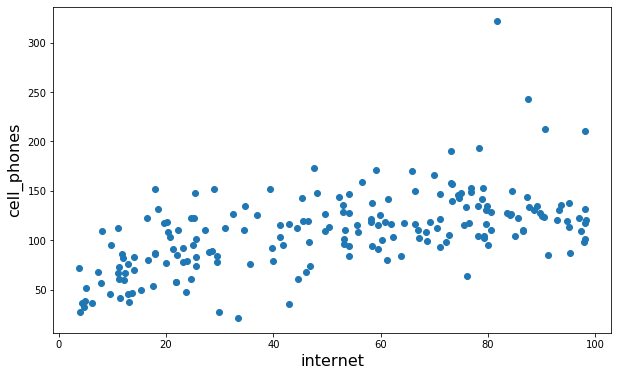

In [118]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter('internet', 'cell_phones',data=new_df)
ax.set_xlabel("internet", size=16)
ax.set_ylabel("cell_phones", size=16)
# plt.title("Scatter Plot with Matplotlib", size=18)
plt.show()

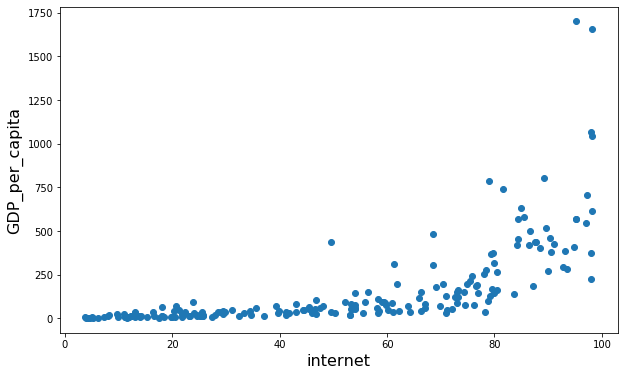

In [123]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter('internet', 'GDP_per_capita',data=new_df)
ax.set_xlabel("internet", size=16)
ax.set_ylabel("GDP_per_capita", size=16)
# plt.title("Scatter Plot with Matplotlib", size=18)
plt.show()

In [130]:
print(new_df['internet'].corr(new_df['GDP_per_capita']))
print(new_df['cell_phones'].corr(new_df['GDP_per_capita']))
# print(new_df['internet'].corr(new_df['cell_phones']))

0.6571794505972296
0.30386399684152815


In [287]:
file_name = 'sushruth_dataset/pollution.csv'
data = pd.read_csv(file_name)

In [288]:
required = list(data.columns)

In [289]:
required = ['Country Name','CO2 emissions (kt) [EN.ATM.CO2E.KT]','Electricity production from coal sources (% of total) [EG.ELC.COAL.ZS]',
           'Electricity production from hydroelectric sources (% of total) [EG.ELC.HYRO.ZS]',
           'Electricity production from natural gas sources (% of total) [EG.ELC.NGAS.ZS]',
#            'Electricity production from nuclear sources (% of total) [EG.ELC.NUCL.ZS]',
           'Electricity production from oil sources (% of total) [EG.ELC.PETR.ZS]','Population, total [SP.POP.TOTL]',
           'GDP per capita (current US$) [NY.GDP.PCAP.CD]']

In [290]:
new_data = []
for i in range(data.shape[0]):
    flag = False
    tmp = []
    for j in required[1:]:
        try:
            t = float(data[j][i])
            if j == 'GDP per capita (current US$) [NY.GDP.PCAP.CD]':
                tmp.append(int(t/100))
            elif j == 'CO2 emissions (kt) [EN.ATM.CO2E.KT]':
                tmp.append(t/float(data['Population, total [SP.POP.TOTL]'][i]))
            else:
                tmp.append(t)
        except ValueError:
            flag = True
            break
    if not flag:
        tmp.append(data[required[0]][i])
        new_data.append(tmp)

In [291]:
new_df = pd.DataFrame(new_data, columns = ['CO2','coal','hydro','gas','oil','pop','gdp','country'])

In [274]:
import statistics

In [275]:
mean = statistics.mean(new_df['CO2'])
median = statistics.median(new_df['CO2'])
var =statistics.pvariance(new_df['CO2'],mean)
print(mean,median,var)

0.005495809555203792 0.0036304932217740126 4.123677662198792e-05


In [276]:
mean = statistics.mean(new_df['gdp'])
median = statistics.median(new_df['gdp'])
var =statistics.pvariance(new_df['gdp'],mean)
print(mean,median,var)

151.43283582089552 63.0 36954.0962352417


In [293]:
from sklearn import preprocessing

x = new_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x[:,0].reshape(-1,1))
df_co2 = pd.DataFrame(x_scaled,columns=['CO2'])
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x[:,6].reshape(-1,1))
df_gdp = pd.DataFrame(x_scaled,columns=['gdp'])

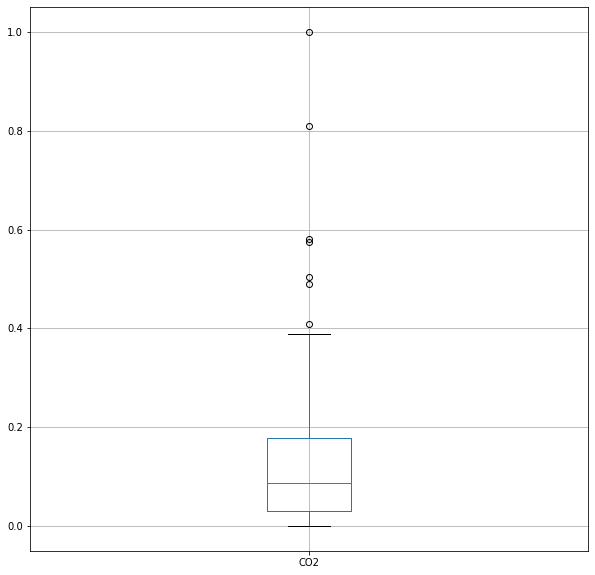

In [294]:
boxplot = df_co2.boxplot(column=['CO2'], return_type='axes',figsize=(10,10))
new_df['CO2'] = df_co2['CO2']

In [295]:
mean = statistics.mean(df_co2['CO2'])
median = statistics.median(df_co2['CO2'])
var =statistics.pvariance(df_co2['CO2'],mean)
print(mean,median,var)

0.1312003886183225 0.0863663739355329 0.023822919511454967


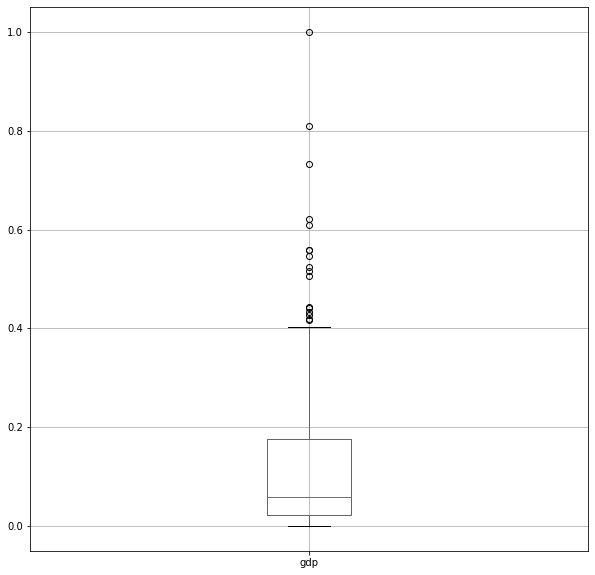

In [296]:
boxplot = df_gdp.boxplot(column=['gdp'], return_type='axes',figsize=(10,10))
new_df['gdp'] = df_gdp['gdp']

In [297]:
mean = statistics.mean(df_gdp['gdp'])
median = statistics.median(df_gdp['gdp'])
var =statistics.pvariance(df_gdp['gdp'],mean)
print(mean,median,var)

0.14611777583835037 0.05847373637264618 0.03629779578957048


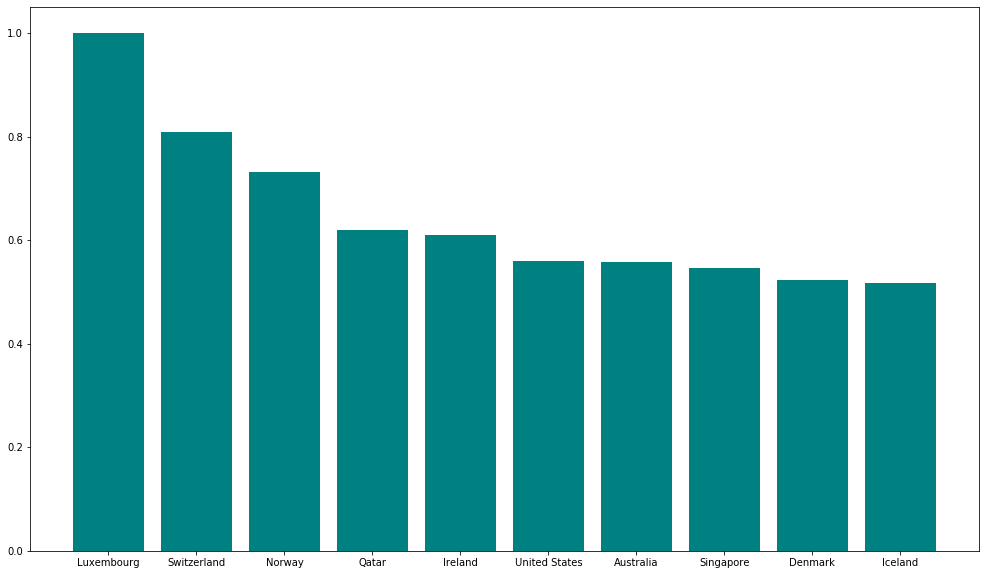

In [327]:
val = zip(new_df['gdp'],new_df['country'])
val = sorted(val,key = lambda x:-x[0])
max_co2 = list(zip(*val))
fig, ax = plt.subplots(figsize=(17,10))
ax.bar(max_co2[1][0:10], max_co2[0][0:10], color='teal')
plt.show()

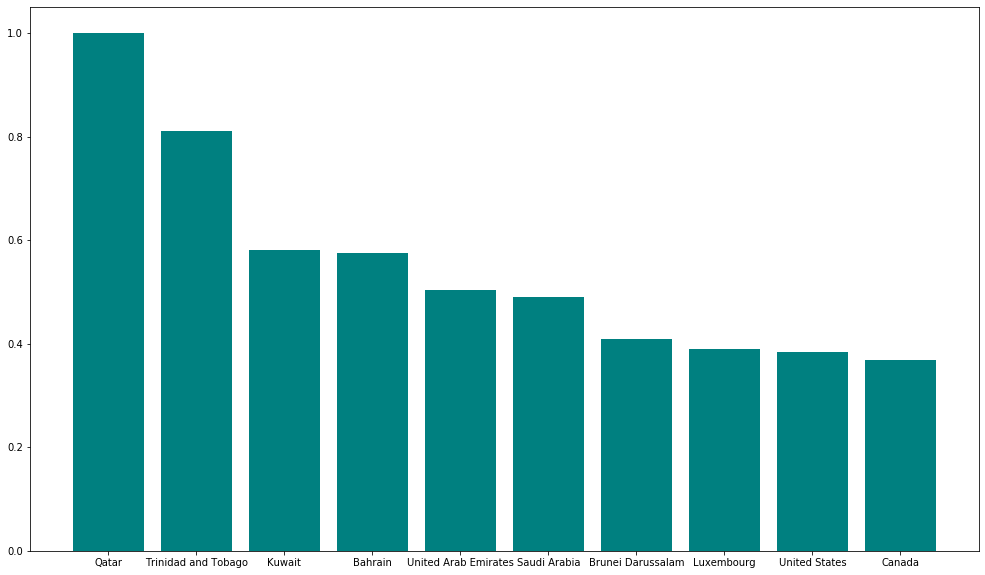

In [326]:
val = zip(new_df['CO2'],new_df['country'])
val = sorted(val,key = lambda x:-x[0])
max_co2 = list(zip(*val))
fig, ax = plt.subplots(figsize=(17,10))
ax.bar(max_co2[1][0:10], max_co2[0][0:10], color='teal')
plt.show()

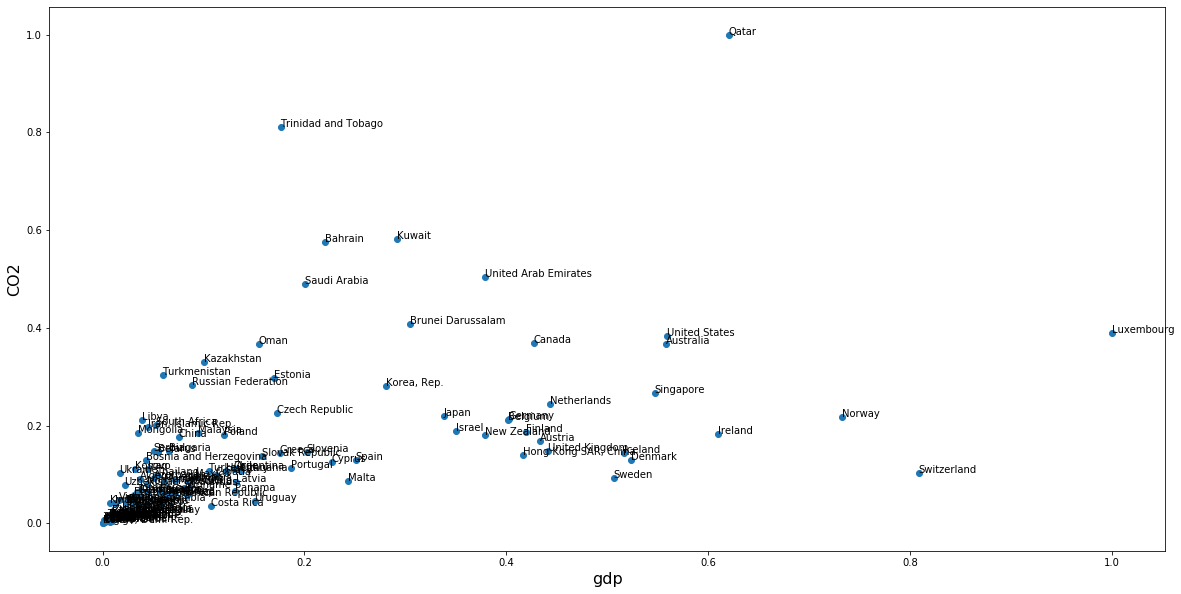

In [302]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter('gdp', 'CO2',data=new_df)
ax.set_xlabel("gdp", size=16)
ax.set_ylabel("CO2", size=16)
# plt.title("Scatter Plot with Matplotlib", size=18)
for i, txt in enumerate(new_df['country']):
    ax.annotate(txt, (new_df['gdp'][i], new_df['CO2'][i]))
plt.show()

In [303]:
print(new_df['CO2'].corr(new_df['gdp']))

0.5474557610669493
